# NOTEBOOK PROYECTO REGRESIÓN LINEAL COSTE SEGURO MÉDICO

## O. INCLUYO DATOS

##### IMPRIMO VISTA PREVIA INICIAL DE LOS DATOS

In [128]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1. Exploración y limpieza

In [129]:
def explore_data(df):
    df.info()
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [130]:
def explore_data(df):
    df.info()
    print(df.shape)
    return df

In [131]:
explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 1.1) Quito los valores duplicados

In [132]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

### 1.2 Eliminar información innecesaria

In [133]:
import pandas as pd
columns_to_drop = []
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

## 2. Análisis de variables Univariadas

### 2.1 Varbiables categóricas

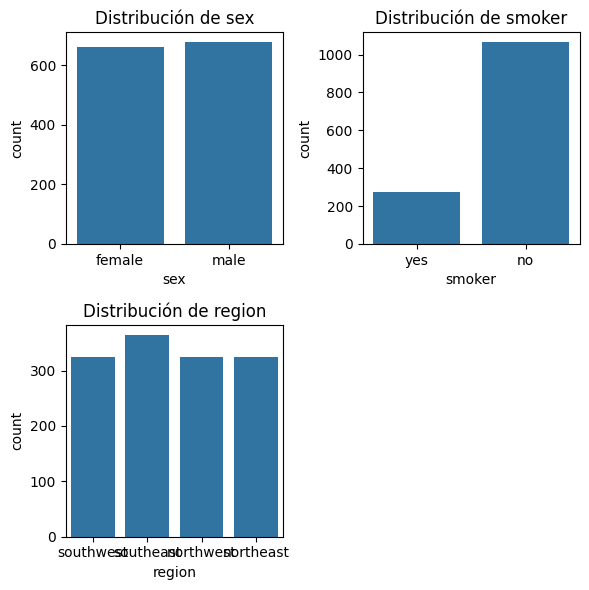

In [134]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) == 0:
    print("No hay columnas categóricas en los datos analizados para generar gráficos de ningún tipo.")  
else:
    num_categorical = len(categorical_cols)
    num_rows = (num_categorical + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(6, 3 * num_rows))
    axes = axes.flatten()
    for i, col in enumerate(categorical_cols):
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')
    for i in range(num_categorical, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

CONCLUSIONES: 1) el sexo está muy equipado en cuanto a reparto 2) hay muchos más no fumadores que gente que fuma 3) la región donde más gente hay es la segunda barra del gráfico.

### 2.2 Variables Numéricas

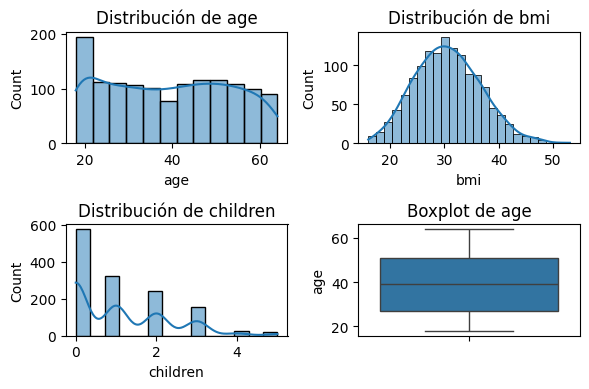

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
def univariate_numerical_analysis(df, target_column):
    """2.2 Análisis de variables numéricas."""
    if df[target_column].dtype == 'object':
        df[target_column + '_n'] = pd.factorize(df[target_column])[0]
        transformation_rules = {row[target_column]: row[target_column + '_n'] for _, row in df[[target_column, target_column + '_n']].drop_duplicates().iterrows()}
        ruta_json = os.path.join("../data/processed/Json", f"{target_column}_transformation_rules.json")
        os.makedirs(os.path.dirname(ruta_json), exist_ok=True)
        with open(ruta_json, "w") as f:
            json.dump(transformation_rules, f)
        target_column = target_column + '_n'
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    num_numerical = len(numerical_cols)
    num_rows = (num_numerical + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(6, 2 * num_rows))
    axes = axes.flatten()
    for i, col in enumerate(numerical_cols):
        sns.histplot(x=col, data=df, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')
        if i + num_numerical < len(axes):
            sns.boxplot(y=col, data=df, ax=axes[i + num_numerical])
            axes[i + num_numerical].set_title(f'Boxplot de {col}')
    for i in range(num_numerical * 2, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()
target_column = 'charges'
univariate_numerical_analysis(df, target_column)

Conclusiones:



Edad (age):

La mayoría de las personas tienen edades entre 20 y 60 años.
La mediana de la edad está alrededor de los 40 años.
Índice de Masa Corporal (bmi):

La mayoría de los valores de bmi están entre 20 y 40.
La mediana del bmi está alrededor de 30.
Número de Hijos (children):

La mayoría de las personas tienen entre 0 y 2 hijos.
La mediana del número de hijos está en 1 hijo.
Costos Médicos (charges):

La mayoría de los costos médicos están entre 0 y 20,000.
La mediana de los costos médicos está alrededor de 10,000.

## 3. Análisis de variables multivariante

### 3.1 Numérico-numérico

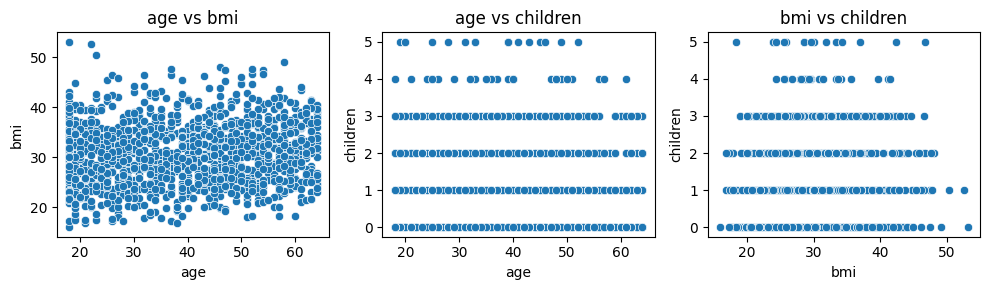

In [136]:
def bivariate_numerical_analysis(df):
    """3.1 Análisis numérico-numérico."""
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    if len(numerical_cols) > 1:
        num_plots = len(numerical_cols) * (len(numerical_cols) - 1) // 2
        cols = 3
        rows = (num_plots // cols) + (1 if num_plots % cols != 0 else 0)
        fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
        axes = axes.flatten()
        plot_index = 0
        for i in range(len(numerical_cols)):
            for j in range(i + 1, len(numerical_cols)):
                ax = axes[plot_index]
                sns.scatterplot(x=numerical_cols[i], y=numerical_cols[j], data=df, ax=ax)
                ax.set_title(f'{numerical_cols[i]} vs {numerical_cols[j]}')
                plot_index += 1
        for k in range(plot_index, len(axes)):
            fig.delaxes(axes[k])
        plt.tight_layout()
        plt.show()
bivariate_numerical_analysis(df)

CONLCUSIONES

- Relación entre age y charges: Observando el gráfico de dispersión entre age y charges, se puede concluir que a medida que aumenta la edad, los costos médicos tienden a ser mayores. Esto sugiere que las personas mayores pueden necesitar más atención médica, lo que incrementa sus gastos.
- Relación entre bmi y charges: Si el gráfico muestra una correlación positiva entre el índice de masa corporal (bmi) y los costos médicos (charges), se puede concluir que un mayor índice de masa corporal está asociado con mayores costos médicos. Esto podría indicar que las personas con un mayor bmi tienen más problemas de salud que requieren atención médica.
- Relación entre children y charges: Si no hay una relación clara entre el número de hijos (children) y los costos médicos (charges), se puede concluir que el número de hijos no tiene un impacto significativo en los costos médicos.
- Relación entre bmi y age: Si los gráficos de dispersión muestran que no hay una relación clara entre bmi y age, se puede concluir que el índice de masa corporal no varía significativamente con la edad.
- Identificación de outliers: Si se observan puntos que se alejan significativamente del resto de los datos en cualquier gráfico de dispersión, estos puntos pueden ser identificados como outliers. Por ejemplo, si hay individuos con costos médicos (charges) extremadamente altos, se podría investigar más para entender las razones detrás de estos costos elevados.

### 3.2 Categótico-categórico

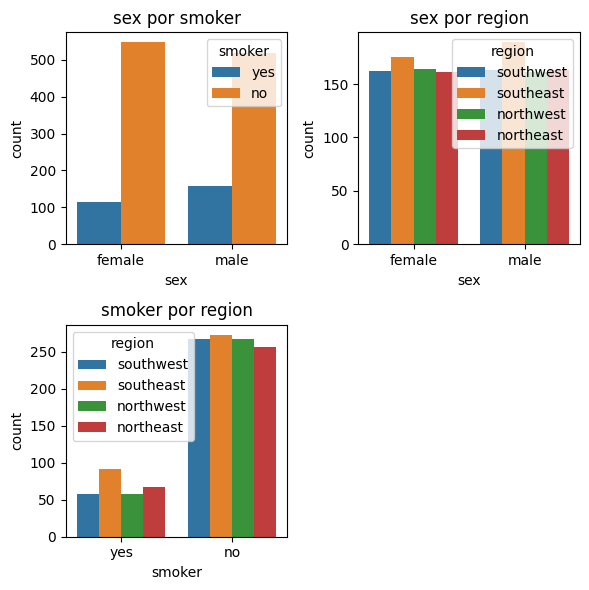

In [137]:
def bivariate_categorical_analysis(df):
    """Análisis bivariante de variables categóricas."""
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) < 2:
        print("No hay suficientes columnas categóricas en el DataFrame para realizar un análisis bivariante.")
        return
    from itertools import combinations
    categorical_pairs = list(combinations(categorical_cols, 2))
    num_pairs = len(categorical_pairs)
    num_rows = (num_pairs + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(6,3 * num_rows))
    axes = axes.flatten()
    for i, (col1, col2) in enumerate(categorical_pairs):
        sns.countplot(x=col1, hue=col2, data=df, ax=axes[i])
        axes[i].set_title(f'{col1} por {col2}')
    for i in range(num_pairs, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()
bivariate_categorical_analysis(df)

Conclusiones: 1)Relación entre sex y smoker:Los gráficos muestran la distribución de fumadores y no fumadores por sexo. Si hay más hombres que mujeres fumadores, podrías concluir que el hábito de fumar es más común entre los hombres en este conjunto de datos.
2) Relación entre region y smoker:Los gráficos muestran la distribución de fumadores y no fumadores por región. Si una región tiene una mayor proporción de fumadores, podrías concluir que esa región tiene una mayor prevalencia de tabaquismo.
3) Relación entre sex y region: Los gráficos muestran la distribución de hombres y mujeres por región. Si hay una región con una mayor proporción de un sexo, podrías concluir que esa región tiene una distribución de género particular.
4) Relación entre region y children: Los gráficos muestran la distribución del número de hijos por región. Si una región tiene una mayor proporción de familias con más hijos, podrías concluir que esa región tiene una tendencia a tener familias más grandes.

### 3.3 Combinaciones de la clase con varias predictoras

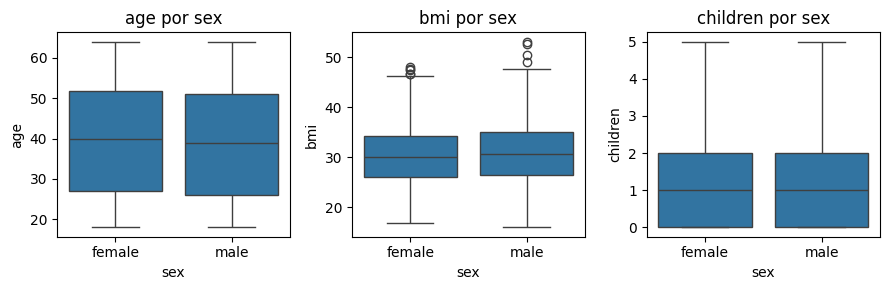

In [138]:
def class_predictor_analysis(df):
    """3.3 Combinaciones de la clase con varias predictoras."""
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(numerical_cols) > 0 and len(categorical_cols) > 0:
        categorical_col = categorical_cols[0]
        cols = 3
        rows = len(numerical_cols) // cols + (1 if len(numerical_cols) % cols != 0 else 0)
        fig, axes = plt.subplots(rows, cols, figsize=(9, 3 * rows))
        axes = axes.flatten()
        for plot_index, col in enumerate(numerical_cols):
            ax = axes[plot_index]
            sns.boxplot(x=categorical_col, y=col, data=df, ax=ax)
            ax.set_title(f'{col} por {categorical_col}')
        for i in range(plot_index + 1, len(axes)):
            fig.delaxes(axes[i])
        plt.tight_layout()
        plt.show()
    else:
        print("No hay suficientes columnas numéricas y/o categóricas para generar los gráficos.")
class_predictor_analysis(df)

Conclusiones: Relación entre sex y age:Los gráficos muestran la distribución de la edad por sexo. Si hay diferencias significativas en las edades entre hombres y mujeres, podrías concluir que la edad varía según el sexo en este conjunto de datos.
Relación entre sex y bmi:Los gráficos muestran la distribución del índice de masa corporal (bmi) por sexo. Si hay diferencias en los valores de bmi entre hombres y mujeres, podrías concluir que el índice de masa corporal varía según el sexo.
Relación entre sex y chidren:Los gráficos muestran la distribución del número de hijos por sexo. Si hay diferencias en el número de hijos entre hombres y mujeres, podrías concluir que el número de hijos varía según el sexo.
Relación entre sex y charges:Los gráficos muestran la distribución de los costos médicos (charges) por sexo. Si hay diferencias en los costos médicos entre hombres y mujeres, podrías concluir que los costos médicos varían según el sexo

### 3.4 Análisis de correlaciones

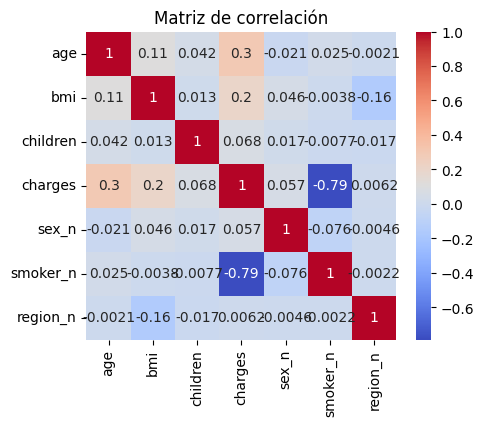

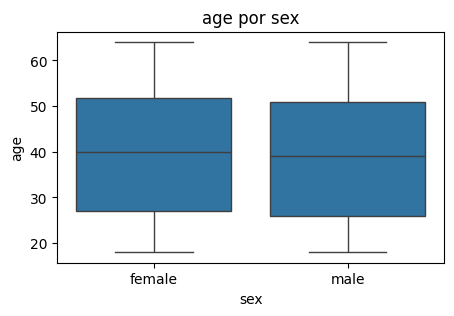

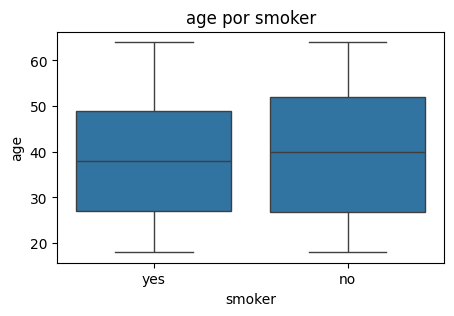

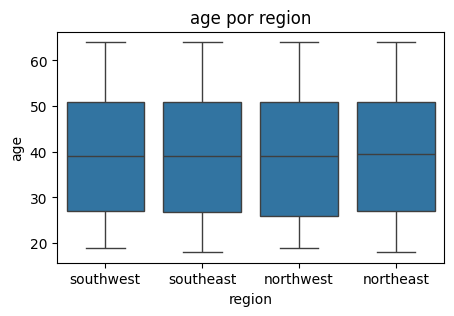

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
def correlation_analysis(df, categorical_to_numerical=None):
    """3.4 Análisis de correlaciones."""
    if categorical_to_numerical:
        for conversion in categorical_to_numerical:
            categorical_col = conversion['categorical_col']
            numerical_col = conversion.get('numerical_col', f"{categorical_col}_n")
            df[numerical_col] = pd.factorize(df[categorical_col])[0]
            transformation_rules = {row[categorical_col]: row[numerical_col] for _, row in df[[categorical_col, numerical_col]].drop_duplicates().iterrows()}
            ruta_json = os.path.join("../data/processed/Json", f"{numerical_col}_transformation_rules.json")
            os.makedirs(os.path.dirname(ruta_json), exist_ok=True) # Crea el directorio si no existe
            with open(ruta_json, "w") as f:
                json.dump(transformation_rules, f)
    numerical_df = df.select_dtypes(include='number')
    plt.figure(figsize=(5, 4))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de correlación')
    plt.show()
def categorical_numerical_correlation(df):
    """Correlación entre variables categóricas y numéricas."""
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(numerical_cols) > 0 and len(categorical_cols) > 0:
        for categorical_col in categorical_cols:
            plt.figure(figsize=(5, 3))
            sns.boxplot(data=df, x=categorical_col, y=numerical_cols[0])
            plt.title(f'{numerical_cols[0]} por {categorical_col}')
            plt.show()
    else:
        print("No hay suficientes columnas numéricas y/o categóricas para generar los gráficos de correlación.")
categorical_to_numerical = [{'categorical_col': 'sex'}, {'categorical_col': 'smoker'}, {'categorical_col': 'region'}]
correlation_analysis(df, categorical_to_numerical)
categorical_numerical_correlation(df)

Conclusiones:Matriz de correlación:

La matriz de correlación muestra las relaciones entre todas las variables numéricas. Valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.
Boxplots de variables categóricas y numéricas:

Los gráficos de caja muestran cómo las variables numéricas varían según las categorías de las variables categóricas. Esto puede ayudar a identificar diferencias significativas entre las categorías.



### 3.5 Categórico-numérico

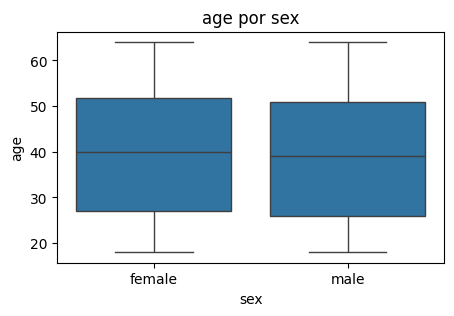

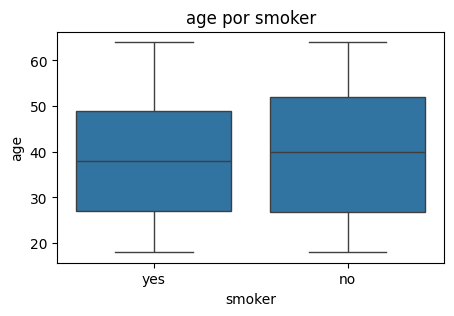

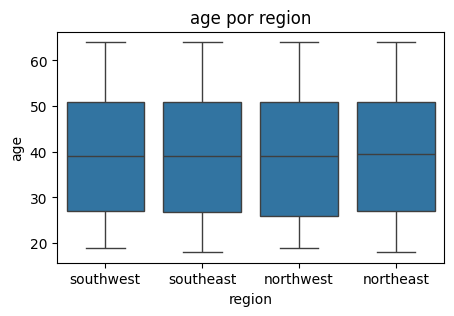

In [140]:
categorical_numerical_correlation(df)

Conclusiones:


Relación entre sex y charges:

Los gráficos de caja muestran que los costos médicos (charges) tienden a ser similares entre hombres y mujeres, sin diferencias significativas.
Relación entre smoker y charges:

Los gráficos de caja indican que los fumadores tienden a tener costos médicos significativamente más altos que los no fumadores, lo que sugiere que fumar está asociado con mayores gastos médicos.
Relación entre region y charges:

Los gráficos de caja muestran variaciones en los costos médicos según la región. Algunas regiones pueden tener costos médicos más altos, lo que podría estar relacionado con factores geográficos o socioeconómicos.

## 4. Análisis de toda la data en una

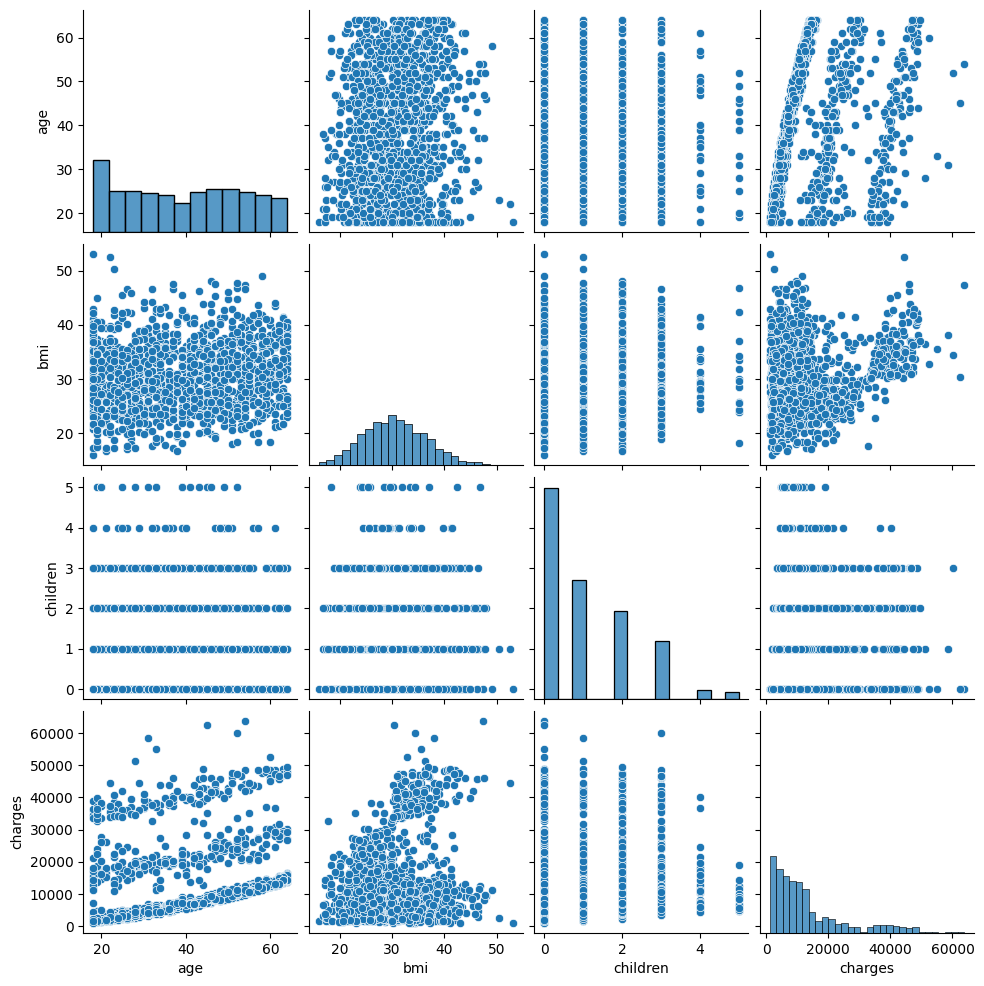

In [141]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
import seaborn as sns
import matplotlib.pyplot as plt 
def pairplot_analysis(df):
	numerical_cols = df.select_dtypes(include=['number']).columns
	sns.pairplot(df[numerical_cols])
	plt.show()
pairplot_analysis(df)


## 5. Feature Engineering

### 5.1 Análisis Outliers

In [142]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [143]:
def analyze_outliers(df):
    """5.1 Análisis Outliers."""
    df_con_outliers = df.copy()
    df_sin_outliers = df.copy()
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    num_cols = len(numerical_cols)
    rows = (num_cols + 4) // 5
    fig, axes = plt.subplots(rows, 5, figsize=(15, 5 * rows))
    axes = axes.flatten()
    for i, col in enumerate(numerical_cols):
        sns.boxplot(ax=axes[i], data=df, y=col)
        axes[i].set_title(col)
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
    return df_sin_outliers, numerical_cols

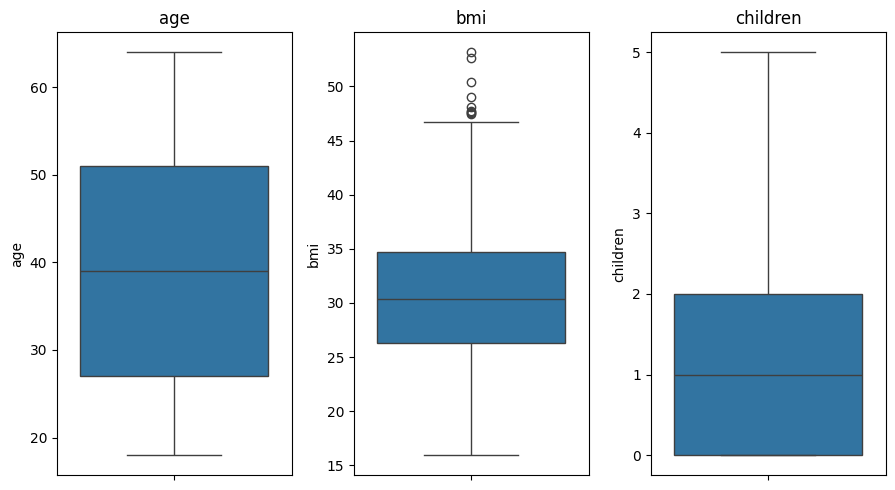

In [144]:
df_sin_outliers, numerical_cols = analyze_outliers(df)

In [145]:
def replace_outliers(df_sin_outliers, numerical_cols):
    """Reemplazar outliers."""
    def replace_outliers_column(column, df):
        colum_stats = df[column].describe()
        IQR = colum_stats["75%"] - colum_stats["25%"]
        lower_bound = colum_stats["25%"] - 1.5 * IQR
        upper_bound = colum_stats["75%"] + 1.5 * IQR
        if lower_bound < 0: lower_bound = min(df[column])
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
        return df.copy(), [lower_bound, upper_bound]

    outliers_dict = {}
    for column in numerical_cols:
        df_sin_outliers, limit_list = replace_outliers_column(column, df_sin_outliers)
        outliers_dict[column] = [float(limit) for limit in limit_list]
    ruta_json = os.path.join("../data/processed/Json", "outliers_dict.json")
    os.makedirs(os.path.dirname(ruta_json), exist_ok=True) # Crea el directorio si no existe
    with open(ruta_json, "w") as f:
        json.dump(outliers_dict, f)
    print(outliers_dict)
    return df_sin_outliers

In [146]:
df_sin_outliers = replace_outliers(df_sin_outliers, numerical_cols)

{'age': [18.0, 87.0], 'bmi': [13.7, 47.290000000000006], 'children': [0.0, 5.0]}


### 5.2  Anáisis de valores faltantes

In [147]:
def handle_missing_values(df_sin_outliers):
    """5.2 Análisis de valores faltantes."""
    print("Valores faltantes por columna:")
    print(df_sin_outliers.isnull().sum())
    numerical_cols = df_sin_outliers.select_dtypes(include=['number']).columns.difference([target_column])
    categorical_cols = df_sin_outliers.select_dtypes(include=['object', 'category']).columns
    for col in numerical_cols:
        df_sin_outliers[col] = df_sin_outliers[col].fillna(df_sin_outliers[col].median())
    for col in categorical_cols:
        df_sin_outliers[col] = df_sin_outliers[col].fillna(df_sin_outliers[col].mode()[0])
    print("\nValores faltantes después de la imputación:")
    print(df_sin_outliers.isnull().sum())
    return df_sin_outliers

In [148]:
handle_missing_values(df_sin_outliers)

Valores faltantes por columna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Valores faltantes después de la imputación:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Conclusiones: 


Valores faltantes iniciales:

El código imprime la cantidad de valores faltantes por columna antes de la imputación. Esto ayuda a identificar qué columnas tienen datos faltantes y la magnitud del problema.
Imputación de valores faltantes:

Para las columnas numéricas, los valores faltantes se rellenan con la mediana de la columna. Esto es útil para mantener la distribución central de los datos sin ser afectado por valores extremos.
Para las columnas categóricas, los valores faltantes se rellenan con la moda (el valor más frecuente). Esto ayuda a mantener la consistencia de las categorías.
Valores faltantes después de la imputación:

El código imprime la cantidad de valores faltantes por columna después de la imputación. Esto confirma que todos los valores faltantes han sido tratados y que el DataFrame está completo.

### 5.3 Inferencia de nuevas caraterísticas

In [149]:
def infer_new_features(df_sin_outliers):
    """5.3 Inferencia de nuevas características."""
    numerical_cols = df_sin_outliers.select_dtypes(include=['number']).columns.difference([target_column])
    if len(numerical_cols) >= 2:
        for feature in inferencia:
            try:
                df_sin_outliers[feature['new_col_name']] = df_sin_outliers[feature['col1']] * df_sin_outliers[feature['col2']]
                print(f"Nueva característica '{feature['new_col_name']}' creada a partir de '{feature['col1']}' y '{feature['col2']}'.")
            except Exception as e:
                print(f"Error al crear la nueva característica '{feature['new_col_name']}': {e}")
    else:
        print("No hay columnas que apliquen para la inferencia.")
    return df_sin_outliers

No existe ninguna columna a la uqe aplicar nuevas características en mi DATAFRAME

## 6. Feature Scalling

#### 6.0) DEFINIMOS Y LLAMAMOS A LAS FUNCIONES

Archivo JSON creado: ../data/processed/sex_n_transformation_rules.json
Archivo JSON creado: ../data/processed/smoker_n_transformation_rules.json
Archivo JSON creado: ../data/processed/region_n_transformation_rules.json


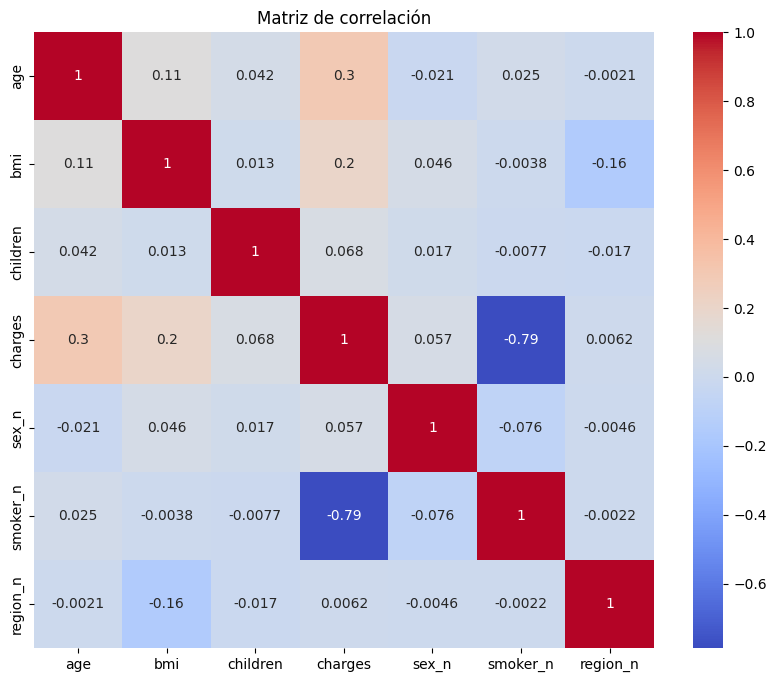

Archivos creados: X_train_con_outliers.xlsx, X_train_sin_outliers.xlsx, X_test_con_outliers.xlsx, X_test_sin_outliers.xlsx, y_train.xlsx, y_test.xlsx


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.model_selection import train_test_split
df_con_outliers = df.copy()
df_sin_outliers = df.copy()

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")

def save_transformation_rules(df, categorical_to_numerical, ruta_guardado):
    """Guardar reglas de transformación en archivos JSON."""
    for conversion in categorical_to_numerical:
        categorical_col = conversion['categorical_col']
        numerical_col = conversion.get('numerical_col', f"{categorical_col}_n")
        df[numerical_col] = pd.factorize(df[categorical_col])[0]
        transformation_rules = {row[categorical_col]: row[numerical_col] for _, row in df[[categorical_col, numerical_col]].drop_duplicates().iterrows()}
        ruta_json = os.path.join(ruta_guardado, f"{numerical_col}_transformation_rules.json")
        os.makedirs(os.path.dirname(ruta_json), exist_ok=True) # Crea el directorio si no existe
        with open(ruta_json, "w") as f:
            json.dump(transformation_rules, f)
        print(f"Archivo JSON creado: {ruta_json}")

def correlation_analysis(df, categorical_to_numerical=None, ruta_guardado="../data/processed/"):
    """3.4 Análisis de correlaciones."""
    if categorical_to_numerical:
        save_transformation_rules(df, categorical_to_numerical, ruta_guardado)
    
    numerical_df = df.select_dtypes(include='number')
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de correlación')
    plt.show()

def categorical_numerical_correlation(df):
    """Correlación entre variables categóricas y numéricas."""
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include(['object']).columns)
    if len(numerical_cols) > 0 and len(categorical_cols) > 0:
        for categorical_col in categorical_cols:
            plt.figure(figsize=(10, 6))
            for numerical_col in numerical_cols:
                sns.boxplot(x=categorical_col, y=numerical_col, data=df)
                plt.title(f'{numerical_col} por {categorical_col}')
                plt.show()
    else:
        print("No hay suficientes columnas numéricas y/o categóricas para generar los gráficos de correlación.")

def feature_scaling(df, df_sin_outliers, ruta_guardado="../data/processed/"):
    """6. Feature Scaling."""
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    X_con_outliers = df.drop(target_column, axis=1)[numerical_cols]
    X_sin_outliers = df_sin_outliers.drop(target_column, axis=1)[numerical_cols]
    y = df[target_column]
    X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size=0.2, random_state=42)
    X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size=0.2, random_state=42)
    
    # Guardar archivos en formato .xlsx
    X_train_con_outliers.to_excel(os.path.join(ruta_guardado, "X_train_con_outliers.xlsx"), index=False)
    X_train_sin_outliers.to_excel(os.path.join(ruta_guardado, "X_train_sin_outliers.xlsx"), index=False)
    X_test_con_outliers.to_excel(os.path.join(ruta_guardado, "X_test_con_outliers.xlsx"), index=False)
    X_test_sin_outliers.to_excel(os.path.join(ruta_guardado, "X_test_sin_outliers.xlsx"), index=False)
    y_train.to_excel(os.path.join(ruta_guardado, "y_train.xlsx"), index=False)
    y_test.to_excel(os.path.join(ruta_guardado, "y_test.xlsx"), index=False)
    
    print("Archivos creados: X_train_con_outliers.xlsx, X_train_sin_outliers.xlsx, X_test_con_outliers.xlsx, X_test_sin_outliers.xlsx, y_train.xlsx, y_test.xlsx")
    return X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, y_train, y_test, numerical_cols

target_column = 'charges'
categorical_to_numerical = [
    {'categorical_col': 'sex', 'numerical_col': 'sex_n'},
    {'categorical_col': 'smoker', 'numerical_col': 'smoker_n'},
    {'categorical_col': 'region', 'numerical_col': 'region_n'}
]

for conversion in categorical_to_numerical:
    categorical_col = conversion['categorical_col']
    numerical_col = conversion['numerical_col']
    if numerical_col not in df.columns:
        df[numerical_col] = pd.factorize(df[categorical_col])[0]

# Ensure the columns 'region_n', 'sex_n', and 'smoker_n' exist in the DataFrame
required_columns = ['region_n', 'sex_n', 'smoker_n']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' is missing in the DataFrame. Ensure it is created before proceeding.")

correlation_analysis(df, categorical_to_numerical)
X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, y_train, y_test, numerical_cols = feature_scaling(df, df_sin_outliers)

In [161]:
X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, y_train, y_test, numerical_cols= feature_scaling(df, df_sin_outliers)


Archivos creados: X_train_con_outliers.xlsx, X_train_sin_outliers.xlsx, X_test_con_outliers.xlsx, X_test_sin_outliers.xlsx, y_train.xlsx, y_test.xlsx


### 6.1 Normalización

Archivo JSON creado: ../data/processed/sex_n_transformation_rules.json
Archivo JSON creado: ../data/processed/smoker_n_transformation_rules.json
Archivo JSON creado: ../data/processed/region_n_transformation_rules.json


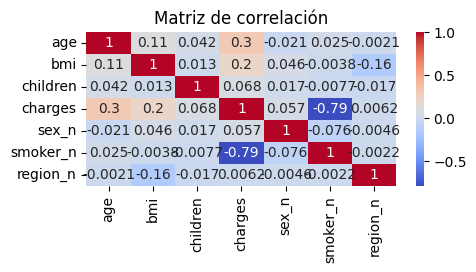

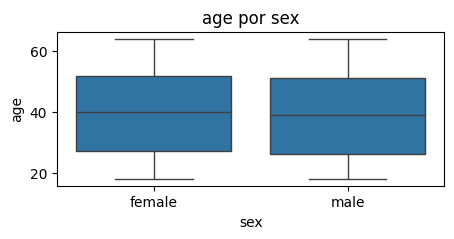

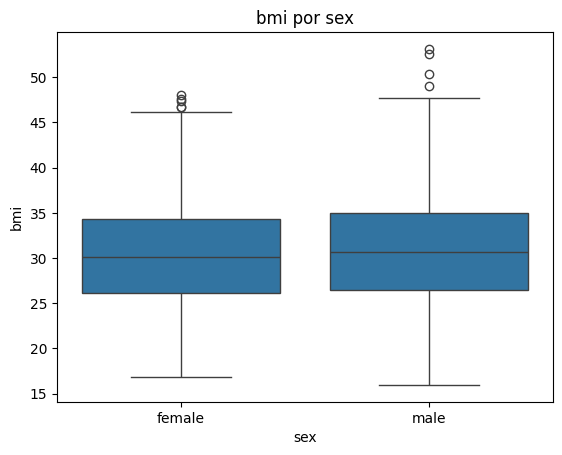

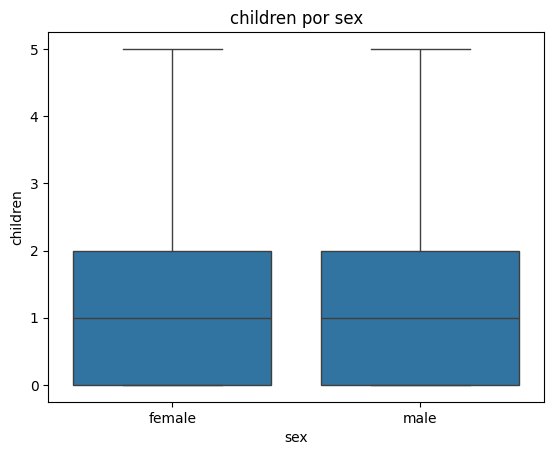

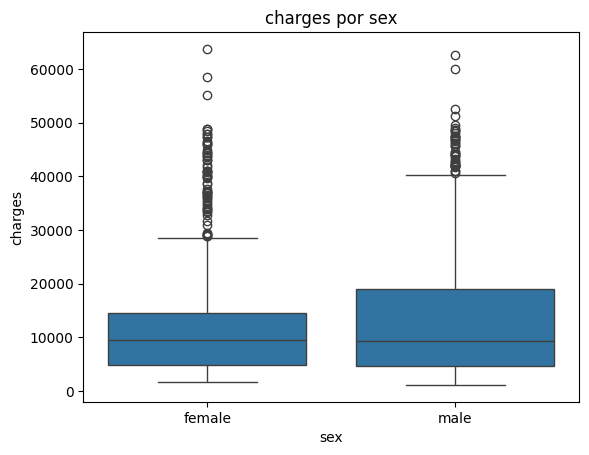

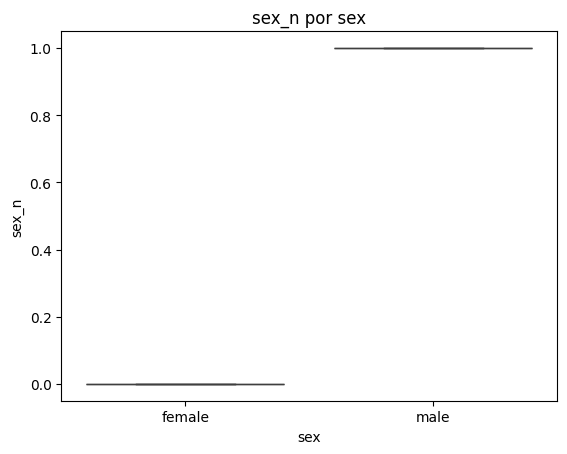

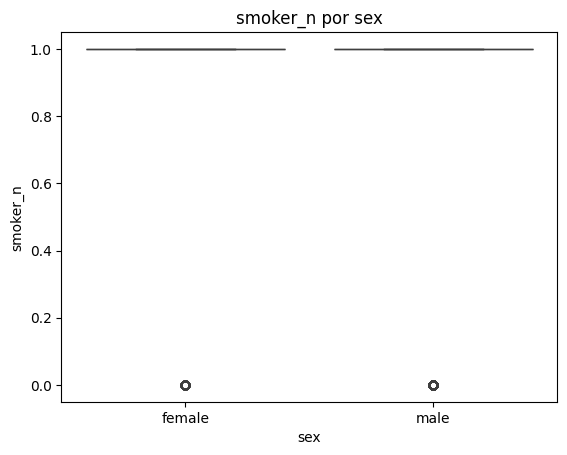

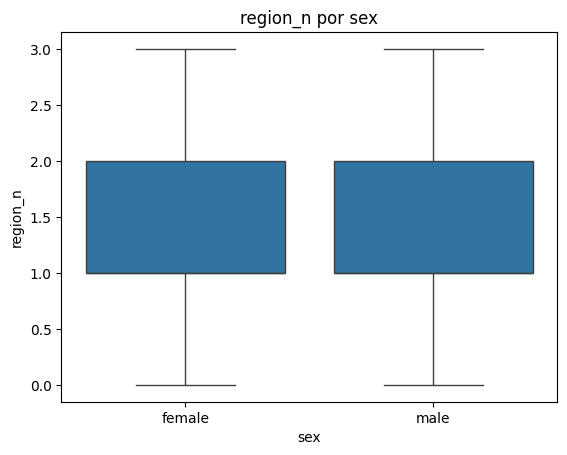

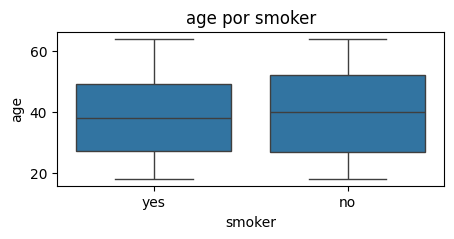

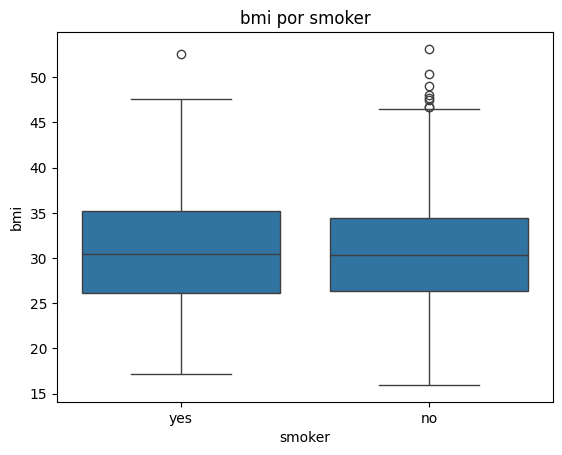

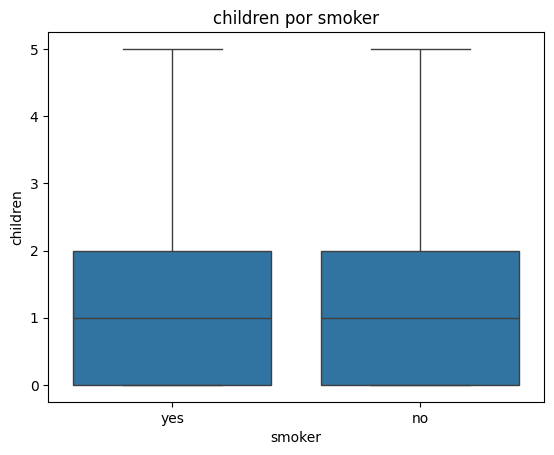

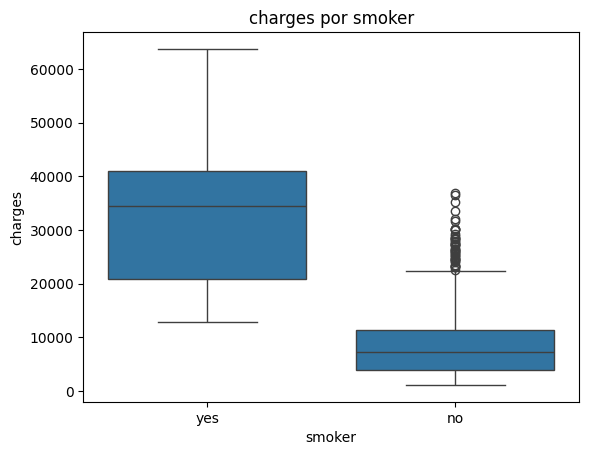

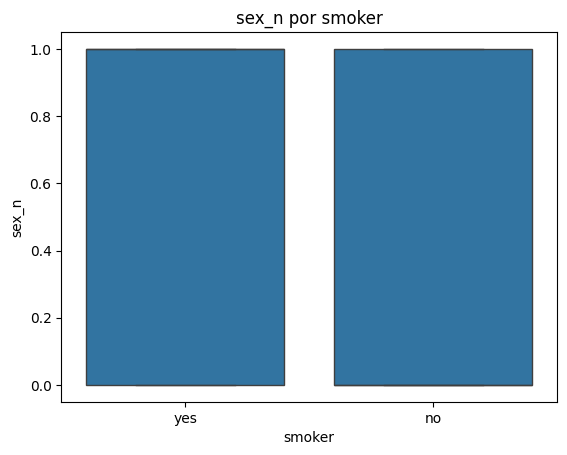

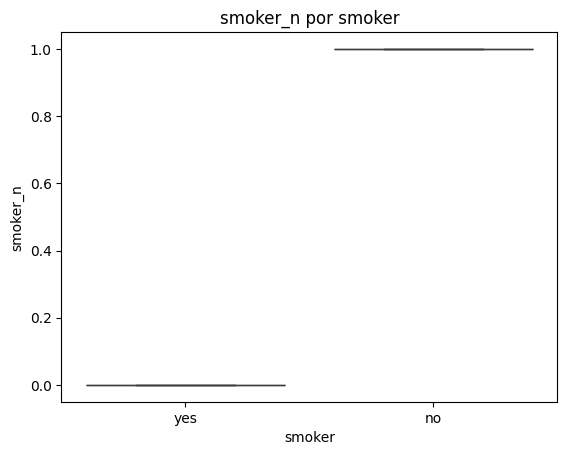

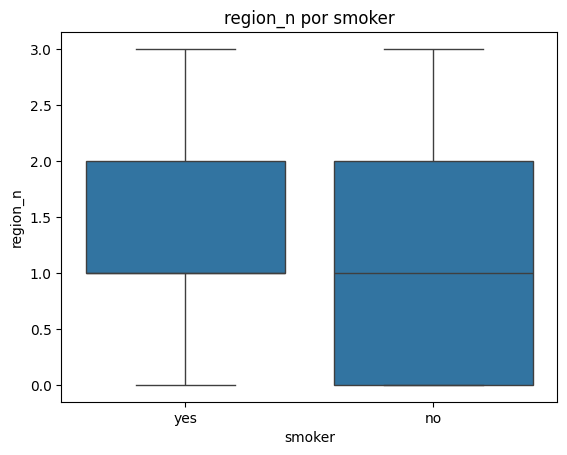

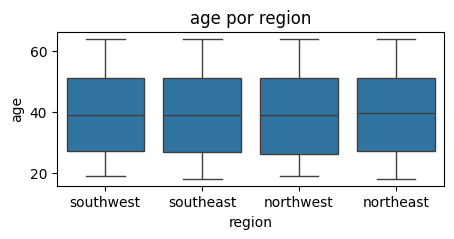

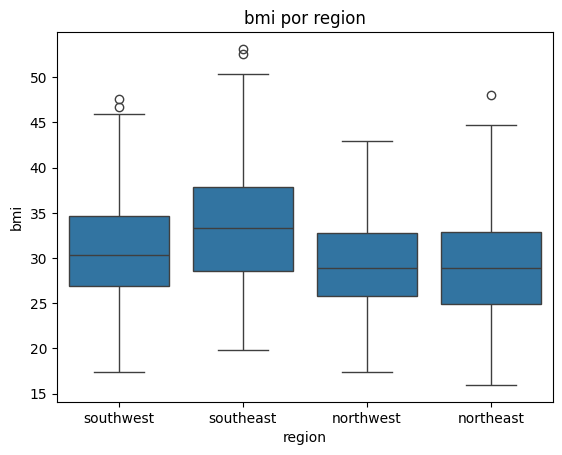

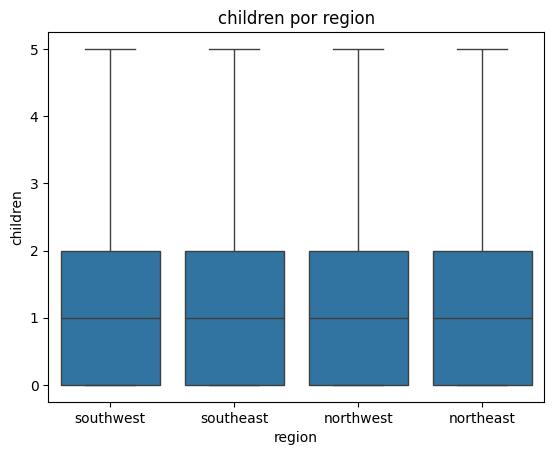

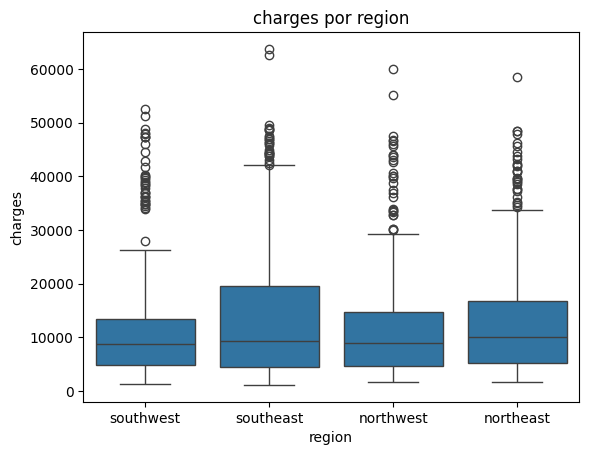

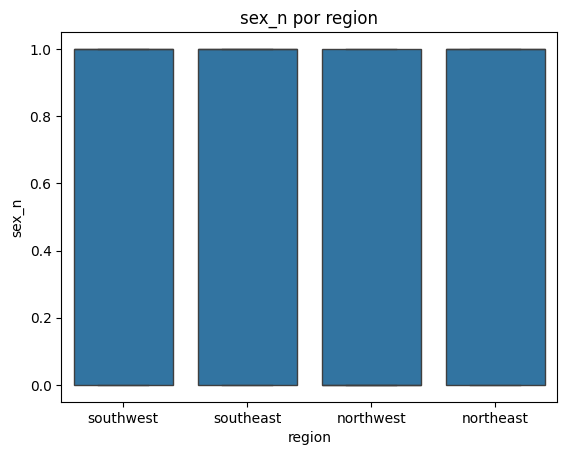

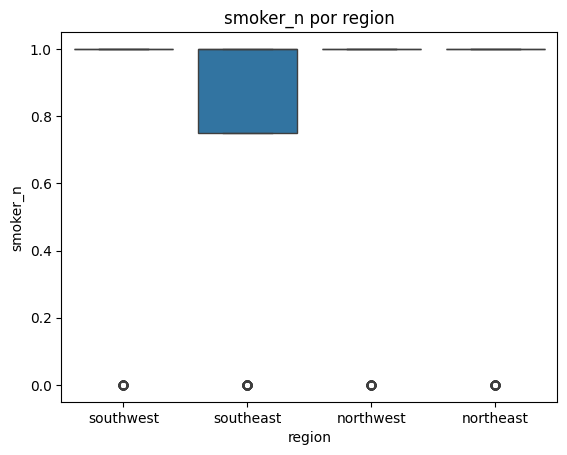

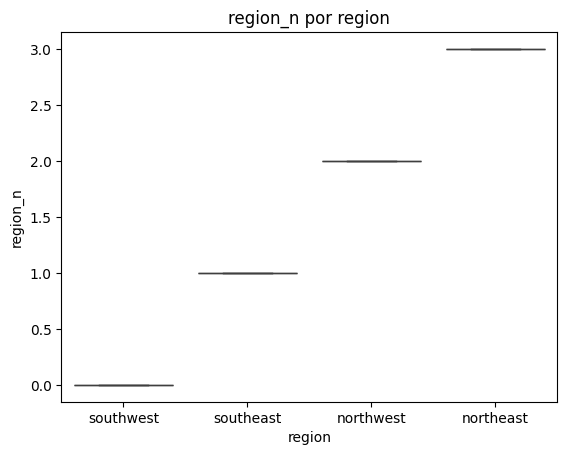

Archivos creados: X_train_con_outliers.xlsx, X_train_sin_outliers.xlsx, X_test_con_outliers.xlsx, X_test_sin_outliers.xlsx, y_train.xlsx, y_test.xlsx
Archivos de normalizadores creados: normalizador_con_outliers.pkl, normalizador_sin_outliers.pkl


In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")

def save_transformation_rules(df, categorical_to_numerical, ruta_guardado):
    """Guardar reglas de transformación en archivos JSON."""
    for conversion in categorical_to_numerical:
        categorical_col = conversion['categorical_col']
        numerical_col = conversion.get('numerical_col', f"{categorical_col}_n")
        df[numerical_col] = pd.factorize(df[categorical_col])[0]
        transformation_rules = {row[categorical_col]: row[numerical_col] for _, row in df[[categorical_col, numerical_col]].drop_duplicates().iterrows()}
        ruta_json = os.path.join(ruta_guardado, f"{numerical_col}_transformation_rules.json")
        os.makedirs(os.path.dirname(ruta_json), exist_ok=True) # Crea el directorio si no existe
        with open(ruta_json, "w") as f:
            json.dump(transformation_rules, f)
        print(f"Archivo JSON creado: {ruta_json}")

def correlation_analysis(df, categorical_to_numerical=None, ruta_guardado="../data/processed/"):
    """3.4 Análisis de correlaciones."""
    if categorical_to_numerical:
        save_transformation_rules(df, categorical_to_numerical, ruta_guardado)
    
    numerical_df = df.select_dtypes(include='number')
    plt.figure(figsize=(5, 2))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de correlación')
    plt.show()

def categorical_numerical_correlation(df):
    """Correlación entre variables categóricas y numéricas."""
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(numerical_cols) > 0 and len(categorical_cols) > 0:
        for categorical_col in categorical_cols:
            plt.figure(figsize=(5, 2))
            for numerical_col in numerical_cols:
                sns.boxplot(x=categorical_col, y=numerical_col, data=df)
                plt.title(f'{numerical_col} por {categorical_col}')
                plt.show()
    else:
        print("No hay suficientes columnas numéricas y/o categóricas para generar los gráficos de correlación.")

def feature_scaling(df, df_sin_outliers, ruta_guardado="../data/processed/"):
    """6. Feature Scaling."""
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    X_con_outliers = df.drop(target_column, axis=1)[numerical_cols]
    X_sin_outliers = df_sin_outliers.drop(target_column, axis=1)[numerical_cols]
    y = df[target_column]
    X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size=0.2, random_state=42)
    X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size=0.2, random_state=42)
    
    # Guardar archivos en formato .xlsx
    X_train_con_outliers.to_excel(os.path.join(ruta_guardado, "X_train_con_outliers.xlsx"), index=False)
    X_train_sin_outliers.to_excel(os.path.join(ruta_guardado, "X_train_sin_outliers.xlsx"), index=False)
    X_test_con_outliers.to_excel(os.path.join(ruta_guardado, "X_test_con_outliers.xlsx"), index=False)
    X_test_sin_outliers.to_excel(os.path.join(ruta_guardado, "X_test_sin_outliers.xlsx"), index=False)
    y_train.to_excel(os.path.join(ruta_guardado, "y_train.xlsx"), index=False)
    y_test.to_excel(os.path.join(ruta_guardado, "y_test.xlsx"), index=False)
    
    print("Archivos creados: X_train_con_outliers.xlsx, X_train_sin_outliers.xlsx, X_test_con_outliers.xlsx, X_test_sin_outliers.xlsx, y_train.xlsx, y_test.xlsx")
    return X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, y_train, y_test, numerical_cols

def normalize_data(X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols, ruta_modelo="../models/"):
    """Normalizar datos y guardar normalizadores."""
    os.makedirs(ruta_modelo, exist_ok=True) # Crea el directorio si no existe
    
    normalizador_con_outliers = StandardScaler()
    normalizador_con_outliers.fit(X_train_con_outliers)
    with open(os.path.join(ruta_modelo, "normalizador_con_outliers.pkl"), "wb") as file:
        pickle.dump(normalizador_con_outliers, file)
    X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
    X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
    
    normalizador_sin_outliers = StandardScaler()
    normalizador_sin_outliers.fit(X_train_sin_outliers)
    with open(os.path.join(ruta_modelo, "normalizador_sin_outliers.pkl"), "wb") as file:
        pickle.dump(normalizador_sin_outliers, file)
    X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
    X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
    
    print("Archivos de normalizadores creados: normalizador_con_outliers.pkl, normalizador_sin_outliers.pkl")
    return X_train_con_outliers_norm, X_test_con_outliers_norm, X_train_sin_outliers_norm, X_test_sin_outliers_norm

# Definir la columna objetivo
target_column = 'charges'

# Llamar a las funciones
categorical_to_numerical = [{'categorical_col': 'sex'}, {'categorical_col': 'smoker'}, {'categorical_col': 'region'}]
correlation_analysis(df, categorical_to_numerical)
categorical_numerical_correlation(df)
X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, y_train, y_test, numerical_cols = feature_scaling(df, df_sin_outliers)
X_train_con_outliers_norm, X_test_con_outliers_norm, X_train_sin_outliers_norm, X_test_sin_outliers_norm = normalize_data(X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols)

In [163]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_con_outliers = df.drop(target_column, axis=1)[numerical_cols] 
X_train_con_outliers_norm, X_test_con_outliers_norm, X_train_sin_outliers_norm, X_test_sin_outliers_norm = normalize_data(X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols)

Archivos de normalizadores creados: normalizador_con_outliers.pkl, normalizador_sin_outliers.pkl


In [164]:
def normalize_data(X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols, ruta_guardado="../data/processed/", ruta_modelo="../models/"):
    """6.1 Normalización."""
    normalizador_con_outliers = StandardScaler()
    normalizador_con_outliers.fit(X_train_con_outliers)
    with open(os.path.join(ruta_modelo, "normalizador_con_outliers.pkl"), "wb") as file:
        pickle.dump(normalizador_con_outliers, file)
    X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
    X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index=X_train_con_outliers.index, columns=numerical_cols)
    X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
    X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index=X_test_con_outliers.index, columns=numerical_cols)
    X_train_con_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_train_con_outliers_norm.xlsx"), index=False)
    X_test_con_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_test_con_outliers_norm.xlsx"), index=False)
    normalizador_sin_outliers = StandardScaler()
    normalizador_sin_outliers.fit(X_train_sin_outliers)
    with open(os.path.join(ruta_modelo, "normalizador_sin_outliers.pkl"), "wb") as file:
        pickle.dump(normalizador_sin_outliers, file)
    X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
    X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index=X_train_sin_outliers.index, columns=numerical_cols)
    X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
    X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index=X_test_sin_outliers.index, columns=numerical_cols)
    X_train_sin_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_train_sin_outliers_norm.xlsx"), index=False)
    X_test_sin_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_test_sin_outliers_norm.xlsx"), index=False)
    print("Archivos creados: X_train_con_outliers_norm.xlsx, X_test_con_outliers_norm.xlsx, X_train_sin_outliers_norm.xlsx, X_test_sin_outliers_norm.xlsx")
    return X_train_con_outliers_norm, X_test_con_outliers_norm, X_train_sin_outliers_norm, X_test_sin_outliers_norm


### 6.2 Escalado Mínimo-Máximo

In [165]:
def scale_min_max_data_1(X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols, ruta_guardado="../data/processed/", ruta_modelo="../models/"):
    """
    Escala los DataFrames, guarda los scalers entrenados y los resultados en archivos XLSX.
    Args:
        X_train_con_outliers (pd.DataFrame): DataFrame de entrenamiento con outliers.
        X_test_con_outliers (pd.DataFrame): DataFrame de prueba con outliers.
        X_train_sin_outliers (pd.DataFrame): DataFrame de entrenamiento sin outliers.
        X_test_sin_outliers (pd.DataFrame): DataFrame de prueba sin outliers.
        numerical_cols (list): Lista de columnas numéricas a escalar.
        ruta_guardado (str): Ruta donde guardar los archivos XLSX.
        ruta_modelo (str): Ruta donde guardar los modelos scaler.
    Returns:
        tuple: Tupla con los cuatro DataFrames escalados.
    """
    try:
        os.makedirs(ruta_modelo, exist_ok=True)
        os.makedirs(ruta_guardado, exist_ok=True)
        scaler_con_outliers = MinMaxScaler()
        scaler_con_outliers.fit(X_train_con_outliers[numerical_cols])
        with open(os.path.join(ruta_modelo, "scaler_con_outliers.pkl"), "wb") as file:
            pickle.dump(scaler_con_outliers, file)
        X_train_con_outliers_scaled = X_train_con_outliers.copy()
        X_test_con_outliers_scaled = X_test_con_outliers.copy()
        X_train_con_outliers_scaled[numerical_cols] = scaler_con_outliers.transform(X_train_con_outliers[numerical_cols])
        X_test_con_outliers_scaled[numerical_cols] = scaler_con_outliers.transform(X_test_con_outliers[numerical_cols])
        scaler_sin_outliers = StandardScaler()
        scaler_sin_outliers.fit(X_train_sin_outliers[numerical_cols])
        with open(os.path.join(ruta_modelo, "scaler_sin_outliers.pkl"), "wb") as file:
            pickle.dump(scaler_sin_outliers, file)
        X_train_sin_outliers_scaled = X_train_sin_outliers.copy()
        X_test_sin_outliers_scaled = X_test_sin_outliers.copy()
        X_train_sin_outliers_scaled[numerical_cols] = scaler_sin_outliers.transform(X_train_sin_outliers[numerical_cols])
        X_test_sin_outliers_scaled[numerical_cols] = scaler_sin_outliers.transform(X_test_sin_outliers[numerical_cols])
        X_train_con_outliers_scaled.to_excel(os.path.join(ruta_guardado, "X_train_con_outliers_scal.xlsx"), index=False)
        X_test_con_outliers_scaled.to_excel(os.path.join(ruta_guardado, "X_test_con_outliers_scal.xlsx"), index=False)
        X_train_sin_outliers_scaled.to_excel(os.path.join(ruta_guardado, "X_train_sin_outliers_scal.xlsx"), index=False)
        X_test_sin_outliers_scaled.to_excel(os.path.join(ruta_guardado, "X_test_sin_outliers_scal.xlsx"), index=False)
        print("DataFrames escalados, modelos guardados y archivos XLSX creados.")
        return X_train_con_outliers_scaled, X_test_con_outliers_scaled, X_train_sin_outliers_scaled, X_test_sin_outliers_scaled
    except Exception as e:
        print(f"Error en scale_min_max_data: {e}")
        return None, None, None, None

## 7. Feature Selection

### 7.1 Selección de Características

In [166]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_scal = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
categorical_cols = df_scal.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_scal[col] = pd.factorize(df_scal[col])[0]
df_scal['y_n'] = pd.factorize(df_scal['charges'])[0]  
X = df_scal.drop("y_n", axis=1)
y = df_scal["y_n"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])
X_train_sel.head()

,age,bmi,children,region,charges
0,39.0,32.800,0.0,0.0,5649.7150
1,59.0,37.100,1.0,0.0,12347.1720
2,33.0,35.245,0.0,3.0,12404.8791
3,42.0,30.000,0.0,0.0,22144.0320
4,44.0,38.950,0.0,2.0,42983.4585


In [167]:
def feature_selection(X_train_con_outliers_norm, X_train_sin_outliers_norm, X_test_con_outliers_norm, X_test_sin_outliers_norm, X_train_con_outliers_scal, X_train_sin_outliers_scal, X_test_con_outliers_scal, X_test_sin_outliers_scal, y_train, y_test, ruta_modelo = "../models/"):
    """7. Feature Selection."""
    """ 7.1 Selección de características"""
    try:
        feature_selection_k = int(input("Ingrese el valor de k para la selección de características: "))
        dataset_name = input("Ingrese el nombre del dataset para entrenar el modelo (X_train_con_outliers_norm, X_train_sin_outliers_norm, X_test_con_outliers_norm, X_test_sin_outliers_norm, X_train_con_outliers_scal, X_train_sin_outliers_scal, X_test_con_outliers_scal, X_test_sin_outliers_scal): ")
        if dataset_name == "X_train_con_outliers_norm":
            feature_selection_dataset = X_train_con_outliers_norm
        elif dataset_name == "X_train_sin_outliers_norm":
            feature_selection_dataset = X_train_sin_outliers_norm
        elif dataset_name == "X_test_con_outliers_norm":
            feature_selection_dataset = X_test_con_outliers_norm
        elif dataset_name == "X_test_sin_outliers_norm":
            feature_selection_dataset = X_test_sin_outliers_norm
        elif dataset_name == "X_train_con_outliers_scal":
            feature_selection_dataset = X_train_con_outliers_scal
        elif dataset_name == "X_train_sin_outliers_scal":
            feature_selection_dataset = X_train_sin_outliers_scal
        elif dataset_name == "X_test_con_outliers_scal":
            feature_selection_dataset = X_test_con_outliers_scal
        elif dataset_name == "X_test_sin_outliers_scal":
            feature_selection_dataset = X_test_sin_outliers_scal
        else:
            raise ValueError("Nombre de dataset no válido.")
    except ValueError as e:
        print(f"Error: {e}")
        return None, None
    modelo_seleccion = SelectKBest(f_classif, k=feature_selection_k)
    modelo_seleccion.fit(feature_selection_dataset, y_train)
    ix = modelo_seleccion.get_support()
    x_train_sel = pd.DataFrame(modelo_seleccion.transform(feature_selection_dataset), columns=feature_selection_dataset.columns.values[ix])
    x_test_sel = pd.DataFrame(modelo_seleccion.transform(X_test_sin_outliers_scal), columns=X_test_sin_outliers_scal.columns.values[ix])
    x_train_sel[target_column] = list(y_train)
    x_test_sel[target_column] = list(y_test)
    ruta_json = os.path.join("../data/processed/Json", f"featureselection_k_{feature_selection_k}.json")
    os.makedirs(os.path.dirname(ruta_json), exist_ok=True)
    with open(ruta_json, "w") as f:
        json.dump(list(x_train_sel.columns), f)
    x_train_sel.to_csv(os.path.join(ruta_modelo, "x_train_sel.csv"), index=False)
    x_test_sel.to_csv(os.path.join(ruta_modelo, "x_test_sel.csv"), index=False)
    print(f"Características seleccionadas: {list(x_train_sel.columns)}")
    return x_train_sel, x_test_sel


In [168]:
def normalize_data(X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols, ruta_guardado="../data/processed/", ruta_modelo="../models/"):
    """6.1 Normalización."""
    normalizador_con_outliers = StandardScaler()
    normalizador_con_outliers.fit(X_train_con_outliers)
    with open(os.path.join(ruta_modelo, "normalizador_con_outliers.pkl"), "wb") as file:
        pickle.dump(normalizador_con_outliers, file)
    X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
    X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index=X_train_con_outliers.index, columns=numerical_cols)
    X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
    X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index=X_test_con_outliers.index, columns=numerical_cols)
    X_train_con_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_train_con_outliers_norm.xlsx"), index=False)
    X_test_con_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_test_con_outliers_norm.xlsx"), index=False)
    normalizador_sin_outliers = StandardScaler()
    normalizador_sin_outliers.fit(X_train_sin_outliers)
    with open(os.path.join(ruta_modelo, "normalizador_sin_outliers.pkl"), "wb") as file:
        pickle.dump(normalizador_sin_outliers, file)
    X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
    X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index=X_train_sin_outliers.index, columns=numerical_cols)
    X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
    X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index=X_test_sin_outliers.index, columns=numerical_cols)
    X_train_sin_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_train_sin_outliers_norm.xlsx"), index=False)
    X_test_sin_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_test_sin_outliers_norm.xlsx"), index=False)
    print("Archivos creados: X_train_con_outliers_norm.xlsx, X_test_con_outliers_norm.xlsx, X_train_sin_outliers_norm.xlsx, X_test_sin_outliers_norm.xlsx")
    return X_train_con_outliers_norm, X_test_con_outliers_norm, X_train_sin_outliers_norm, X_test_sin_outliers_norm

In [ ]:
# Ensure that the scaled variables are created
X_train_con_outliers_scal, X_test_con_outliers_scal, X_train_sin_outliers_scal, X_test_sin_outliers_scal = scale_min_max_data_1(
	X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols
)

# Call the feature_selection function
feature_selection(
	X_train_con_outliers_norm, X_train_sin_outliers_norm, X_test_con_outliers_norm, X_test_sin_outliers_norm,
	X_train_con_outliers_scal, X_train_sin_outliers_scal, X_test_con_outliers_scal, X_test_sin_outliers_scal,
	y_train, y_test
)

DataFrames escalados, modelos guardados y archivos XLSX creados.
